In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../mu-frac-iron-shower-signals.csv")
x_columns = df.columns[2:-2]
y_columns = df.columns[-2:]

In [3]:
X = df[x_columns].to_numpy()
y = df[y_columns].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [4]:
PREDICT_TOP = True

dtrain = xgb.DMatrix(X_train, label=y_train[:, 0 if PREDICT_TOP else 1])
dtest = xgb.DMatrix(X_test, label=y_test[:, 0 if PREDICT_TOP else 1])

In [9]:
param = {
    'max_depth': 8,
    'learning_rate': 0.03,
    'min_child_weight': 2.0,
    'subsample': 1.0,
    'objective': 'reg:logistic',
}

epochs = 500

In [10]:
model = xgb.train(param, dtrain, num_boost_round=epochs, evals=[(dtest, 'test')], verbose_eval=5, early_stopping_rounds=15)

[0]	test-rmse:0.35131
[5]	test-rmse:0.33288
[10]	test-rmse:0.31846
[15]	test-rmse:0.30710
[20]	test-rmse:0.29830
[25]	test-rmse:0.29137
[30]	test-rmse:0.28590
[35]	test-rmse:0.28161
[40]	test-rmse:0.27826
[45]	test-rmse:0.27559
[50]	test-rmse:0.27353
[55]	test-rmse:0.27186
[60]	test-rmse:0.27051
[65]	test-rmse:0.26939
[70]	test-rmse:0.26846
[75]	test-rmse:0.26775
[80]	test-rmse:0.26707
[85]	test-rmse:0.26658
[90]	test-rmse:0.26610
[95]	test-rmse:0.26569
[100]	test-rmse:0.26530
[105]	test-rmse:0.26499
[110]	test-rmse:0.26473
[115]	test-rmse:0.26454
[120]	test-rmse:0.26432
[125]	test-rmse:0.26414
[130]	test-rmse:0.26399
[135]	test-rmse:0.26383
[140]	test-rmse:0.26370
[145]	test-rmse:0.26359
[150]	test-rmse:0.26349
[155]	test-rmse:0.26338
[160]	test-rmse:0.26329
[165]	test-rmse:0.26320
[170]	test-rmse:0.26310
[175]	test-rmse:0.26306
[180]	test-rmse:0.26299
[185]	test-rmse:0.26292
[190]	test-rmse:0.26287
[195]	test-rmse:0.26280
[200]	test-rmse:0.26275
[205]	test-rmse:0.26270
[210]	test-rms

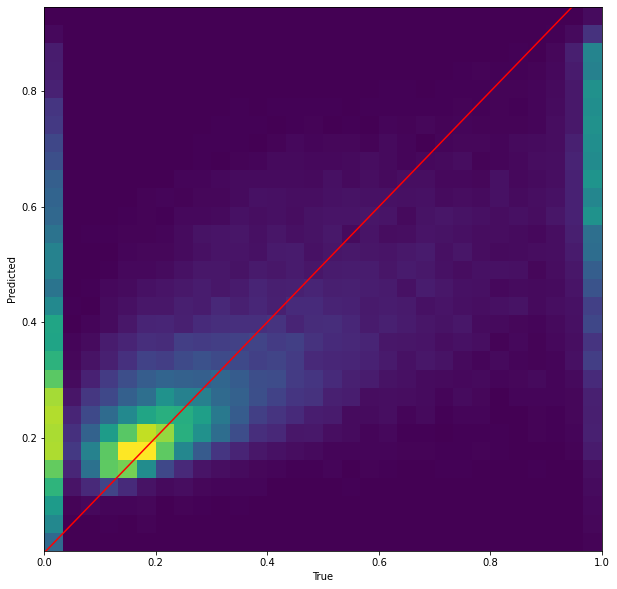

In [12]:
y_pred = model.predict(dtest)
y_true = dtest.get_label()

from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(10, 10))

ax.hist2d(y_true, y_pred, bins=30) # , norm=LogNorm())
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.plot([0, 1], [0, 1], color='red')

plt.savefig(f"../pics/xgboost-evaluation-{param['objective']}.png", bbox_inches='tight')